<a href="https://colab.research.google.com/github/bookang869/VogueAI/blob/main/Tensorflow_Image_Recognition_Minimalist_vs_Streetwear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Image Recognition Minimalist vs Streetwear


# 1) Data Preparation Part using Google Drive


### Connect My Google Drive

In [1]:
# Google Drive Load
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2)  Training part using TensorFlow and pre-trained model
## Trarining My Recognition Model Using Tensorflow and Pre-trained Model


### Load Python Library and TensorFlow

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import os.path
import sys
!pip install tensorflow==2.9.2
import tensorflow as tf
print(tf.__version__)
from google.colab import files
from IPython.display import Image

2.9.2


### Set Training Parameter and Run Training Code

--image_dir="/content/drive/My Drive/research/Chair_armrest/training_set" **<<< Enter a location of a folder with training data**  \


--how_many_training_steps 50 **<<< Enter how many times you want to train a model** \

--model_dir="/content/drive/My Drive/research/Chair_armrest/imagenet" **<<< Enter a location of a pre-trained model to utilize** \

--summaries_dir="/content/drive/My Drive/research/Chair_armrest/training_summaries/chair" **<<< Enter a location of a folder to save a training log file** \


--output_graph="/content/drive/My Drive/research/Chair_armrest/chair_armrest.pb" **<<< Enter a location and file name to save the trained model** \

--output_labels="/content/drive/My Drive/research/Chair_armrest/chair_armrest.txt" **<<< Enter a location to save a label information of the trained model** \

--bottleneck_dir="/content/drive/My Drive/research/Chair_armrest/bottleneck_chair_armrest"  **<<< Enter a location of a folder to save the bottleneck data generated while training the model** \



In [3]:
!nvidia-smi

Tue Sep  3 14:48:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda/lib64:'

In [7]:
!apt-get install -y cuda

E: Could not get lock /var/lib/dpkg/lock. It is held by process 5068 (dpkg)
N: Be aware that removing the lock file is not a solution and may break your system.
E: Unable to lock the administration directory (/var/lib/dpkg/), is another process using it?


In [8]:
!python "/content/drive/MyDrive/research/retrain.py" \
--image_dir="/content/drive/MyDrive/research/training_set" \
--how_many_training_steps 300 \
--model_dir="/content/drive/MyDrive/research/imagenet" \
--summaries_dir="/content/drive/MyDrive/research/summarises/armchair" \
--output_graph="/content/drive/MyDrive/research/armrest.pb" \
--output_labels="/content/drive/MyDrive/research/armrest.txt" \
--bottleneck_dir="/content/drive/MyDrive/research/bottleneck_armrest"

2024-09-03 14:57:13.792082: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
Instructions for updating:
non-resource variables are not supported in the long term
2024-09-03 14:57:21.131753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2024-09-03 14:57:21.132102: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2024-09-03 14:57:21.132377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load

# 3) Recognition part using your trained model

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Define Recognition Function

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
def Recognition (model_name, image_path):
    # display input image
    display(Image(image_path))
    print("Recognition Result:")
    image_data= tf.io.gfile.GFile(image_path, 'rb').read()

    # get model labeling data(.txt)
    label_txt = model_name[:-3] + ".txt"
    label_lines = [line.rstrip() for line in tf.io.gfile.GFile(label_txt)]

    # run recognition
    with tf.io.gfile.GFile(model_name,'rb')as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _=tf.import_graph_def(graph_def,name='')

    with tf.Session() as sess:
        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

        predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0':image_data})

        top_k= predictions[0].argsort()[-len(predictions[0]):][::-1]

    for node_id in top_k:
        human_string = label_lines[node_id]
        score = predictions[0][node_id]
        percent = float(predictions[0][node_id]) * 100
        percent = str('%.2f' % (percent)) + str("%")
        print(' - %s: %s (score = %.5f)'% (human_string, percent, score))
    print("")



## Run your test

Saving 0_korean_minimalist_fashion.jpg to 0_korean_minimalist_fashion.jpg
Saving 0a680845509142d736a6883aa68f9932.jpg to 0a680845509142d736a6883aa68f9932.jpg
Saving 01-botter-menswear-spring-2021-Minimalism-not-Boring-gq-july-2020.jpg to 01-botter-menswear-spring-2021-Minimalism-not-Boring-gq-july-2020.jpg
Saving 1d5faa9b-40de-48e9-9039-86484e24eded.371324e0da20cdb2f0d9883f359afbba.jpeg to 1d5faa9b-40de-48e9-9039-86484e24eded.371324e0da20cdb2f0d9883f359afbba.jpeg
Saving 2aaadaa7475961b32d37835b3ac73fde.jpg to 2aaadaa7475961b32d37835b3ac73fde.jpg
Saving 2bd6fc55c8928669a4d9b6cf14f4f06c.jpg to 2bd6fc55c8928669a4d9b6cf14f4f06c.jpg
Saving 2d0db740706ff84e7b7fef313d21d84b.jpg to 2d0db740706ff84e7b7fef313d21d84b.jpg
Saving 3b23cade837024d0aad477fb208c79cd.jpg to 3b23cade837024d0aad477fb208c79cd.jpg
Saving 3e8355641622f1c21a2477e1d054e15c.jpg to 3e8355641622f1c21a2477e1d054e15c.jpg
Saving 3ee0597af503be247481e0ed5269b3e0.jpg to 3ee0597af503be247481e0ed5269b3e0.jpg


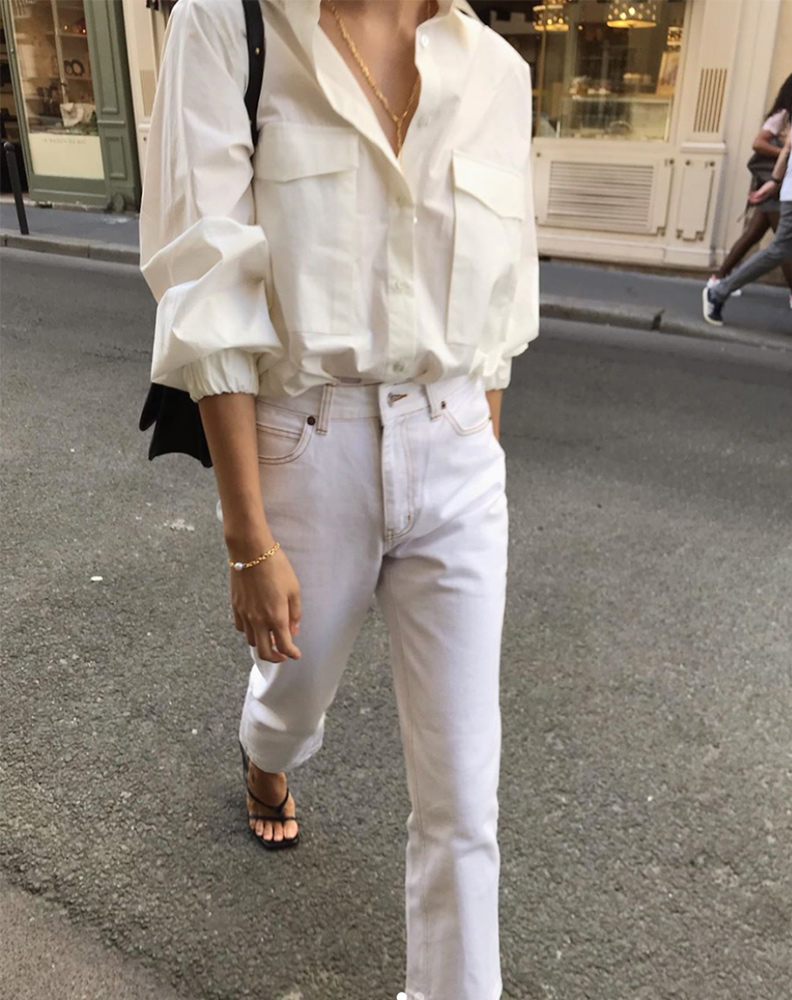

Recognition Result:
 - minimalist: 87.09% (score = 0.87091)
 - street: 12.91% (score = 0.12909)



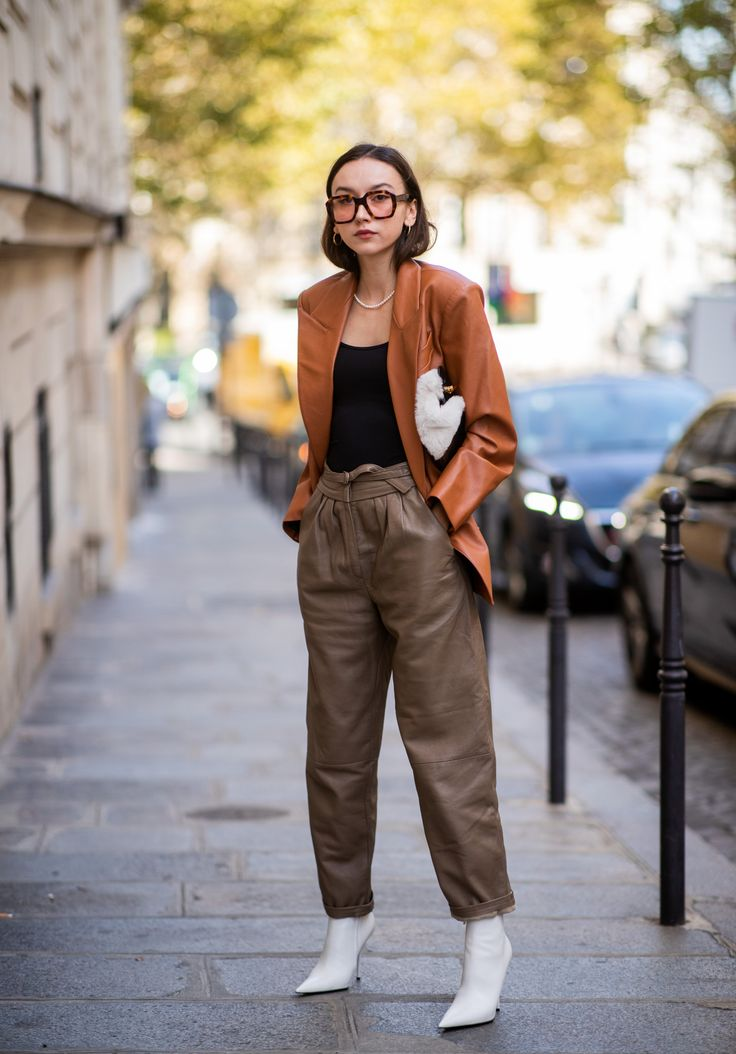

Recognition Result:
 - minimalist: 74.83% (score = 0.74827)
 - street: 25.17% (score = 0.25173)



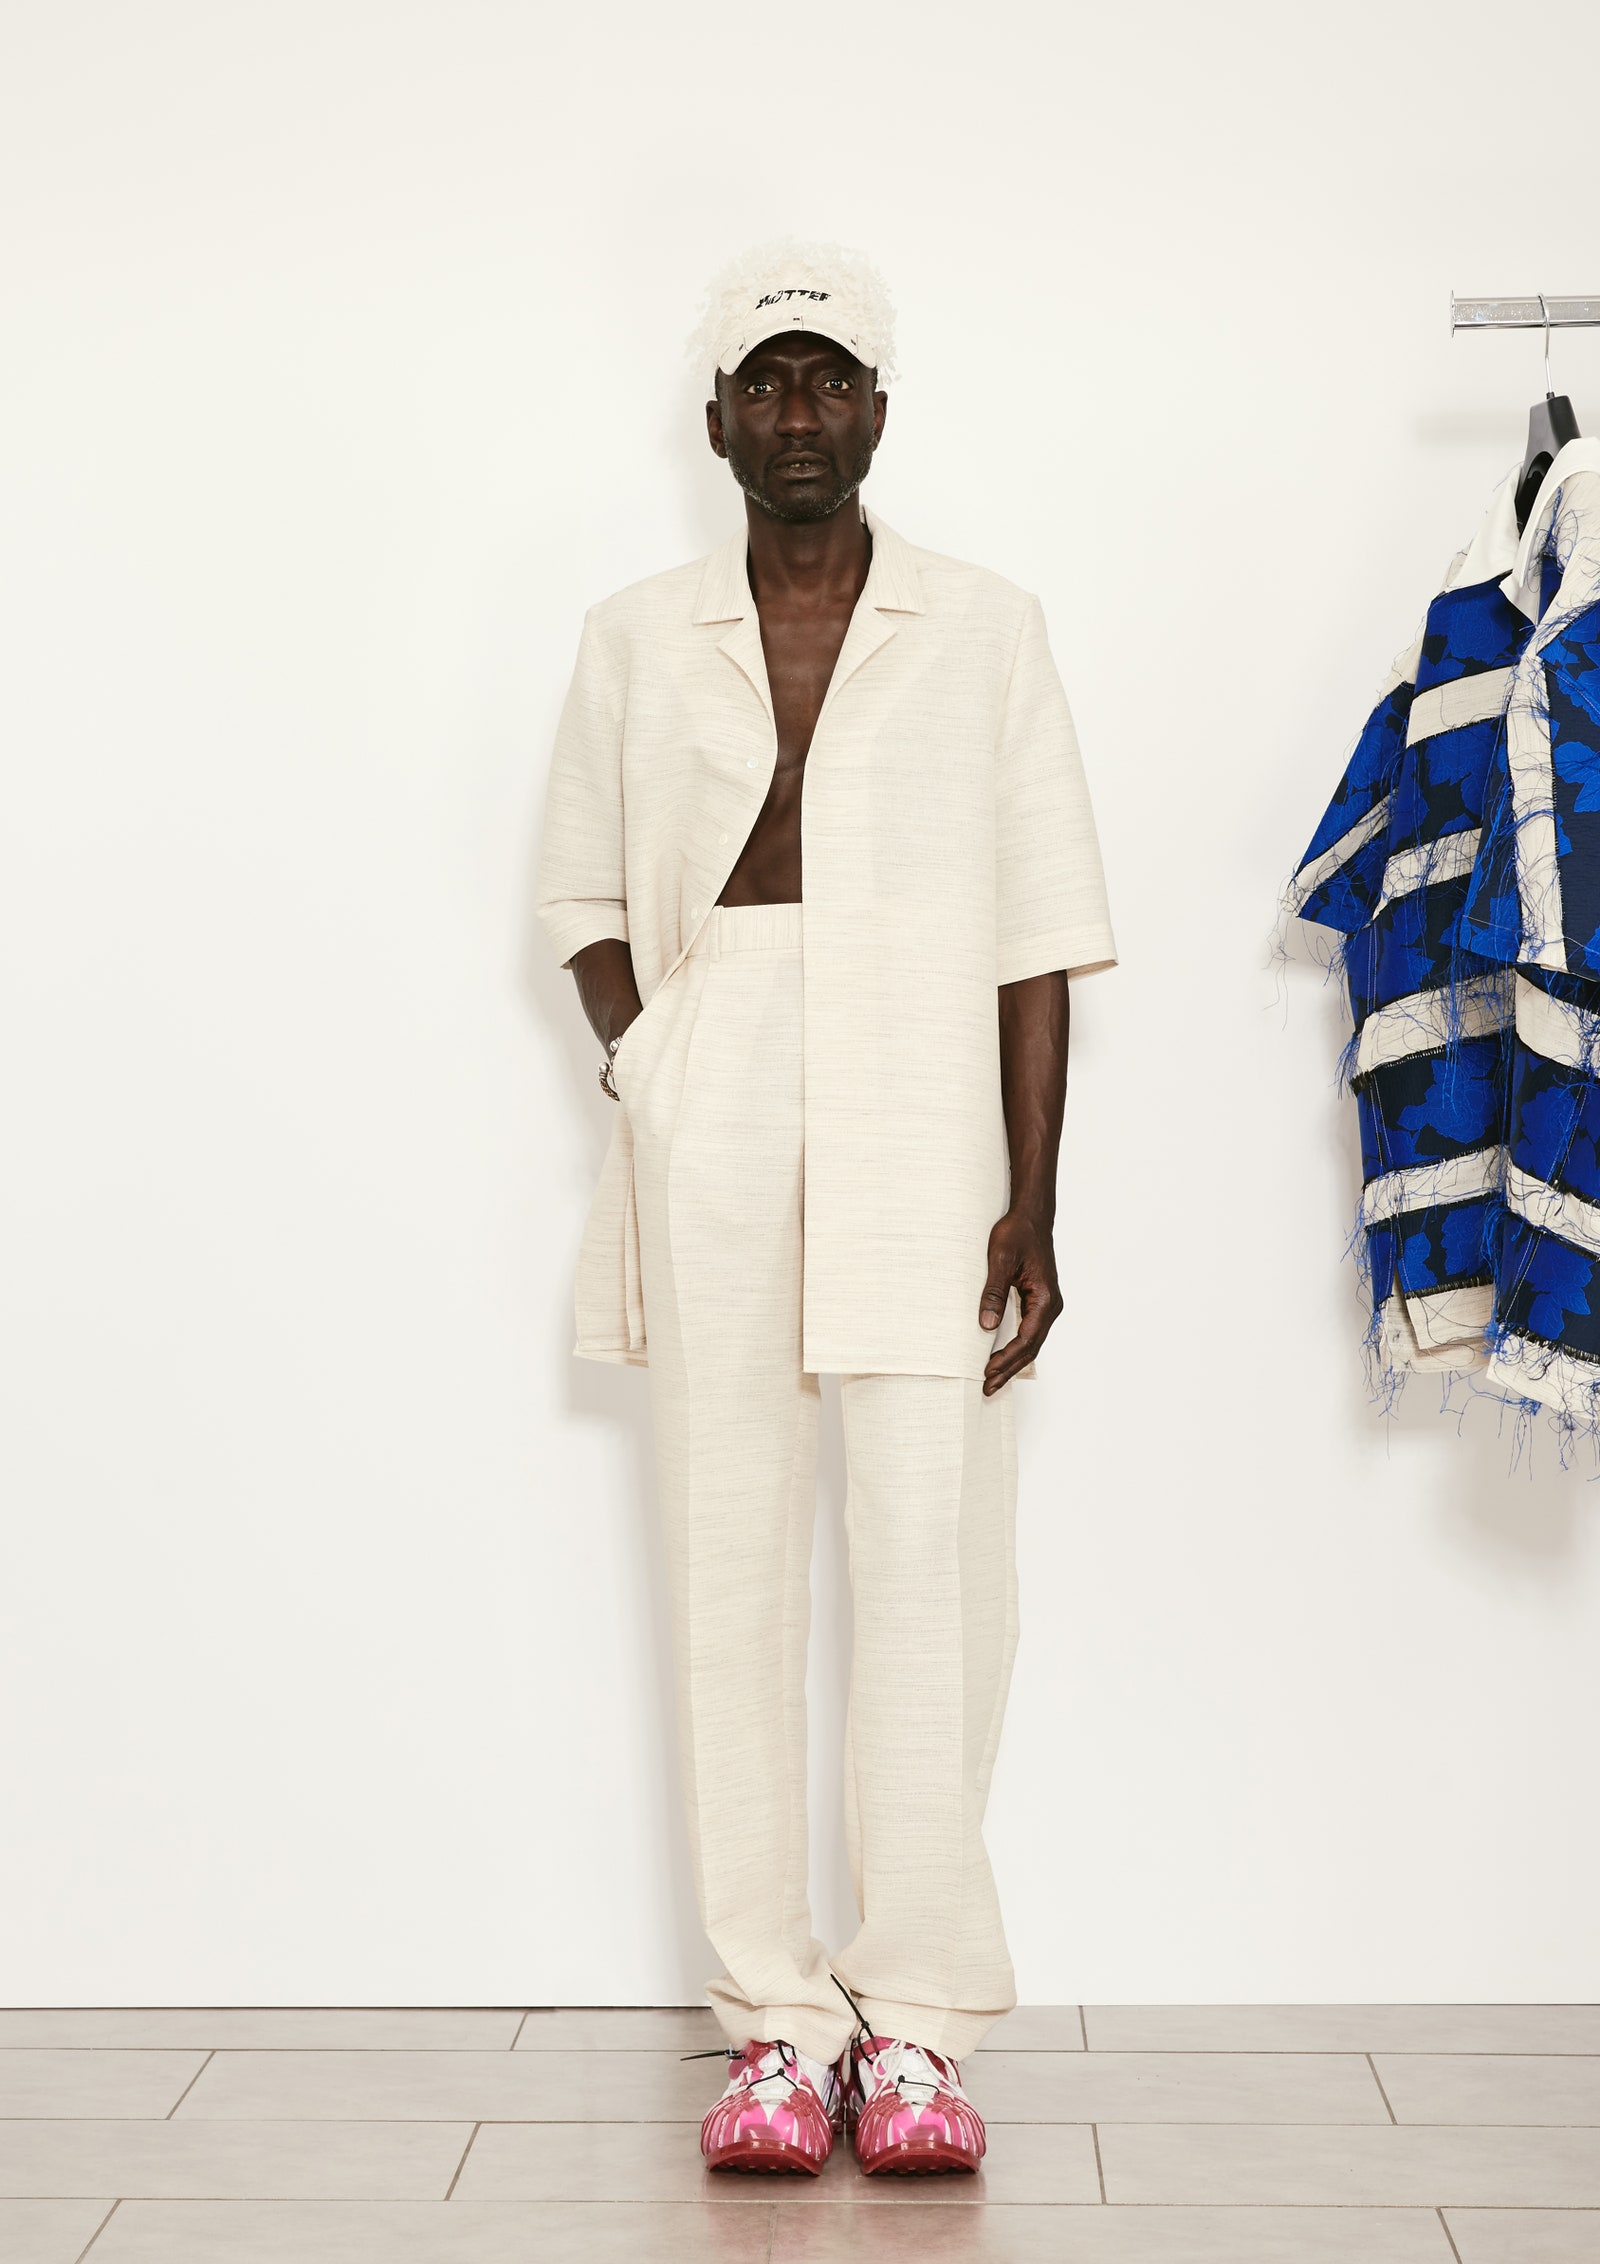

Recognition Result:
 - minimalist: 91.16% (score = 0.91164)
 - street: 8.84% (score = 0.08836)



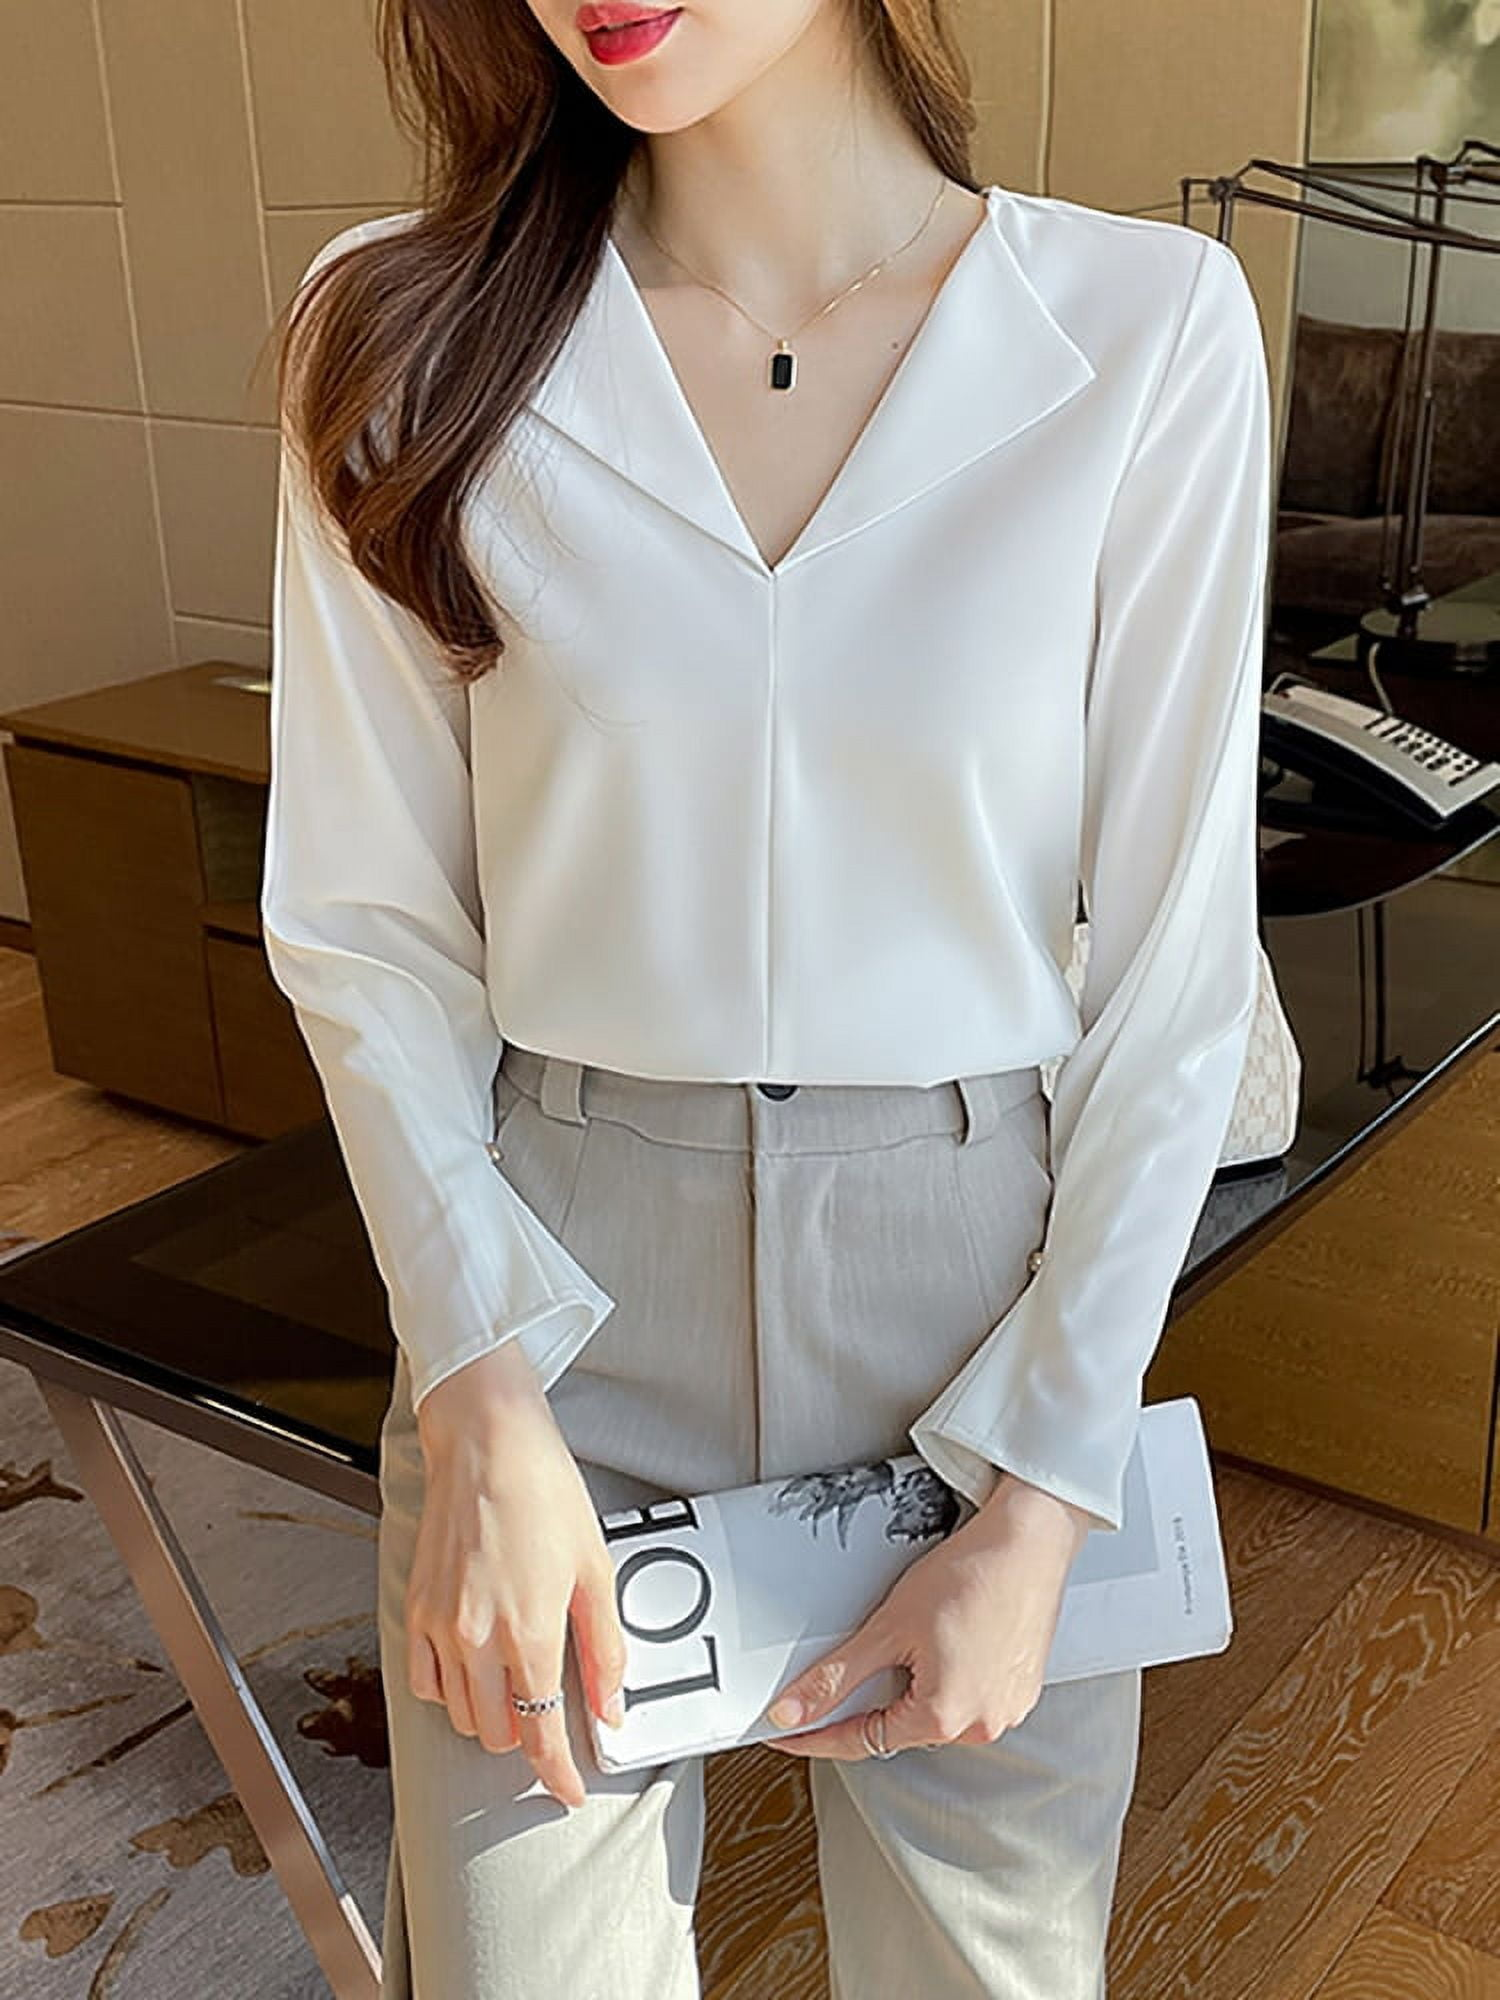

Recognition Result:
 - minimalist: 87.37% (score = 0.87365)
 - street: 12.63% (score = 0.12635)



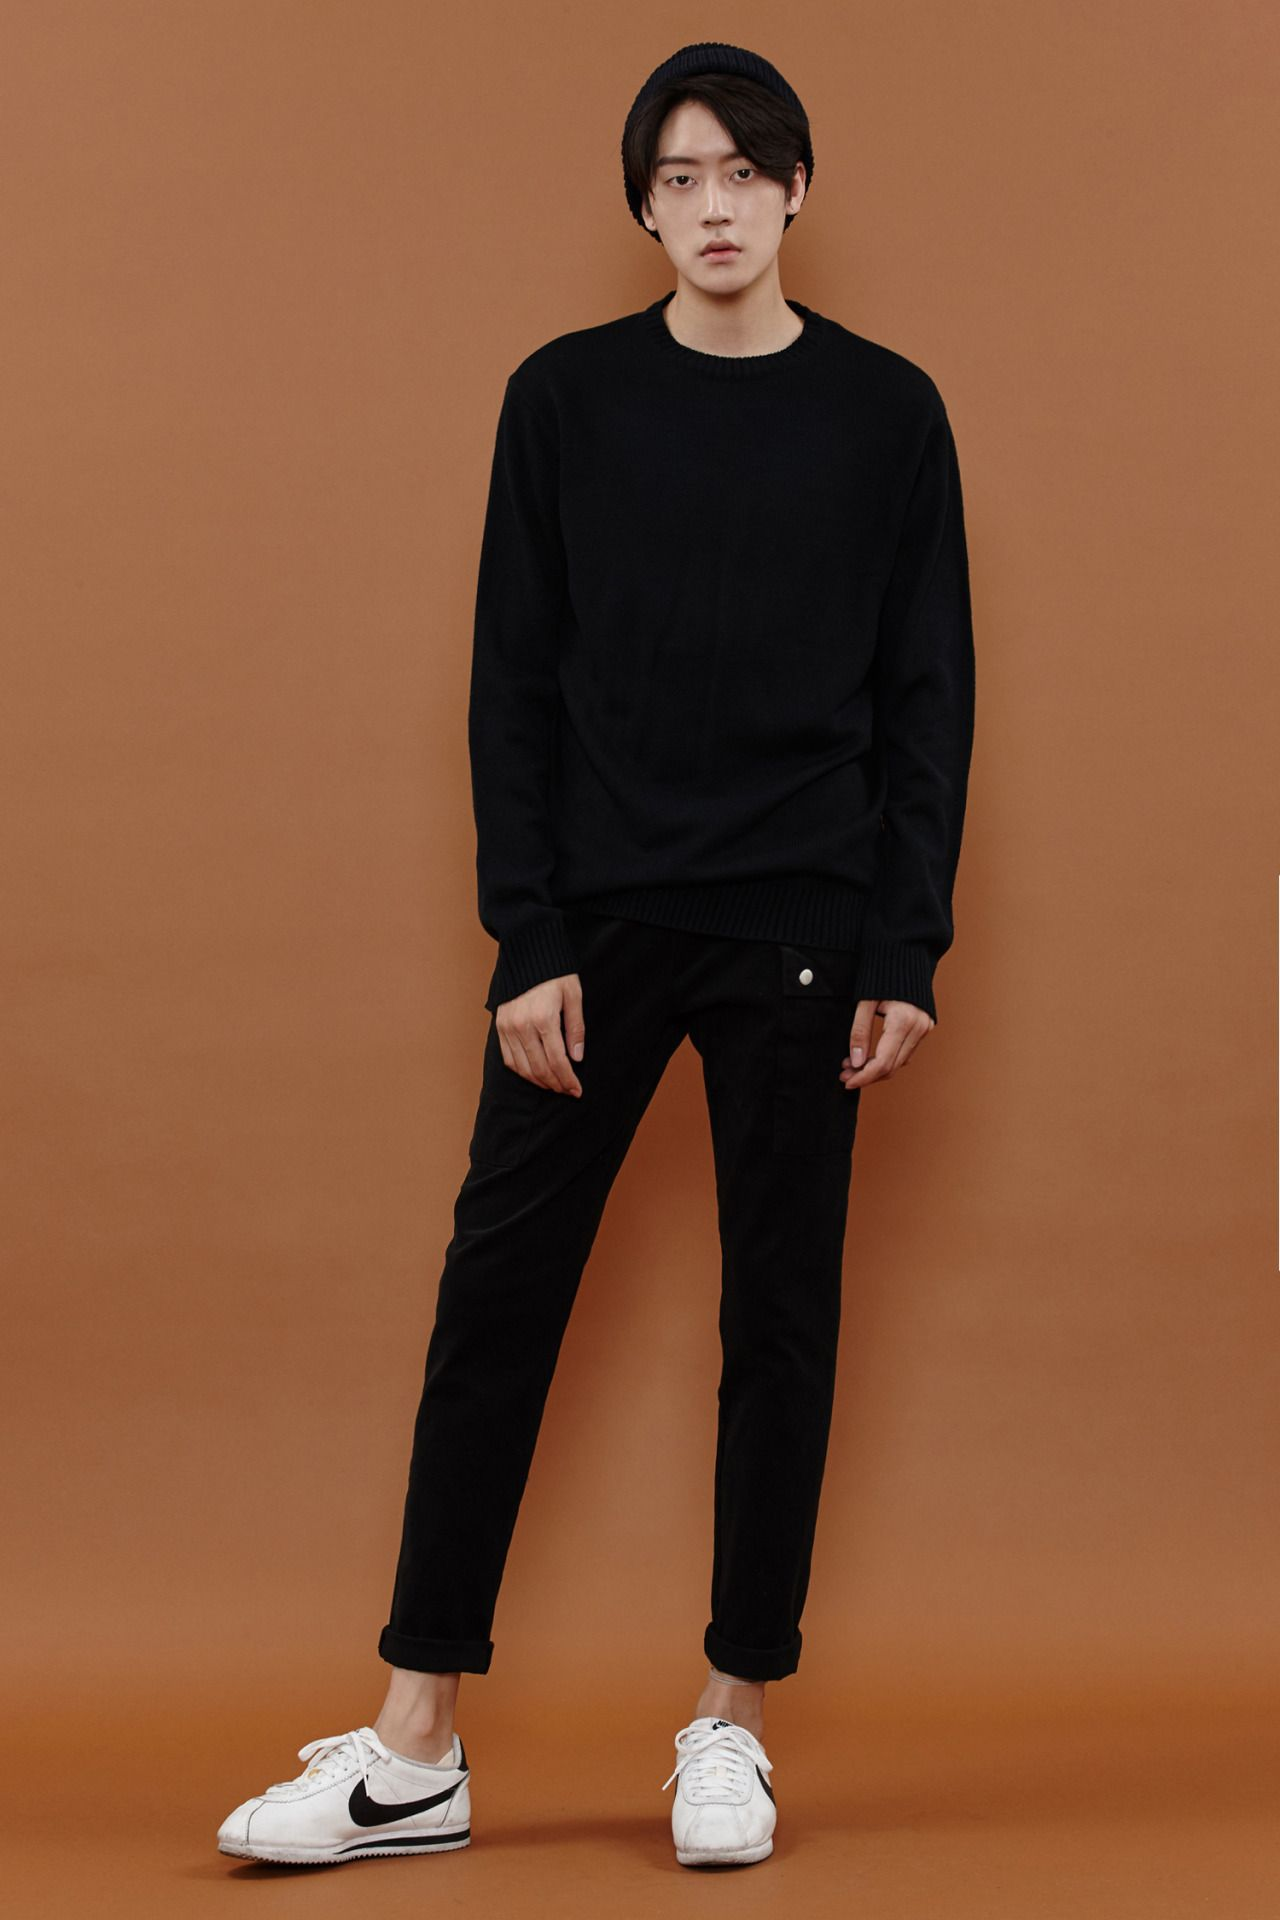

Recognition Result:
 - street: 56.75% (score = 0.56749)
 - minimalist: 43.25% (score = 0.43251)



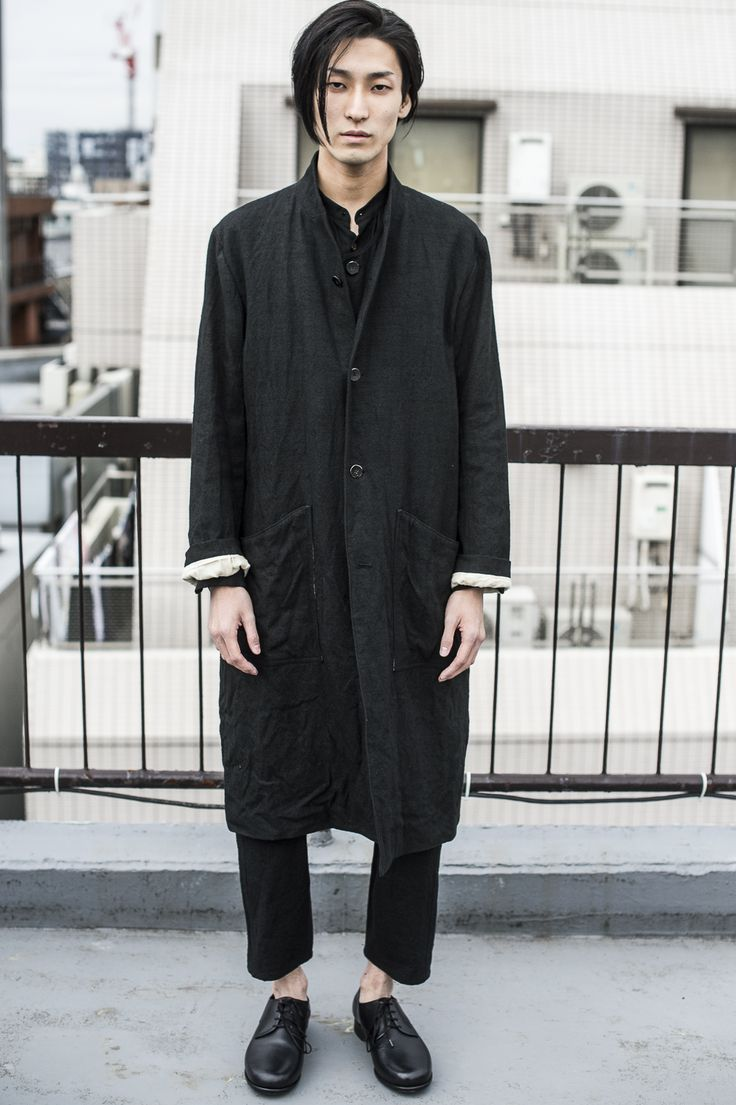

Recognition Result:
 - minimalist: 85.24% (score = 0.85239)
 - street: 14.76% (score = 0.14761)



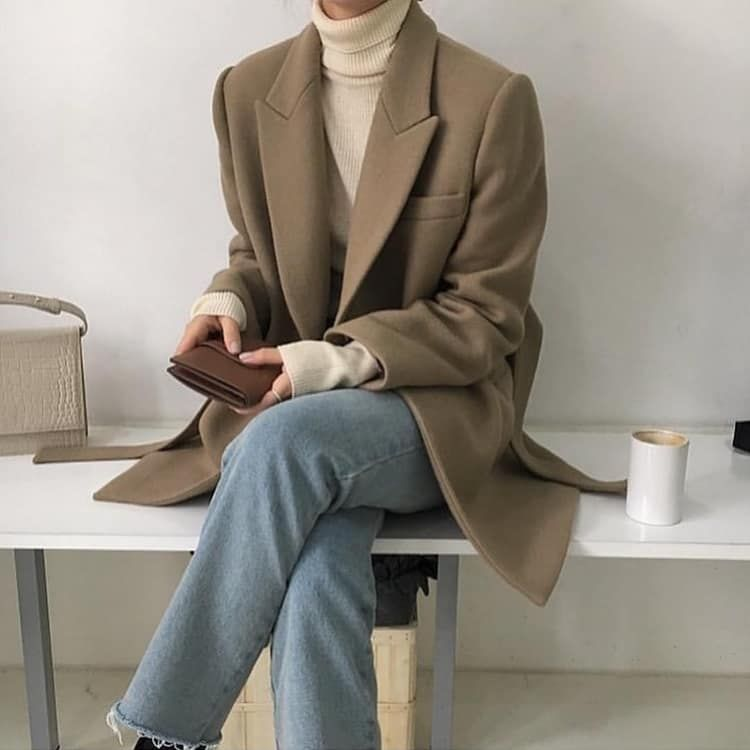

Recognition Result:
 - minimalist: 98.85% (score = 0.98854)
 - street: 1.15% (score = 0.01146)



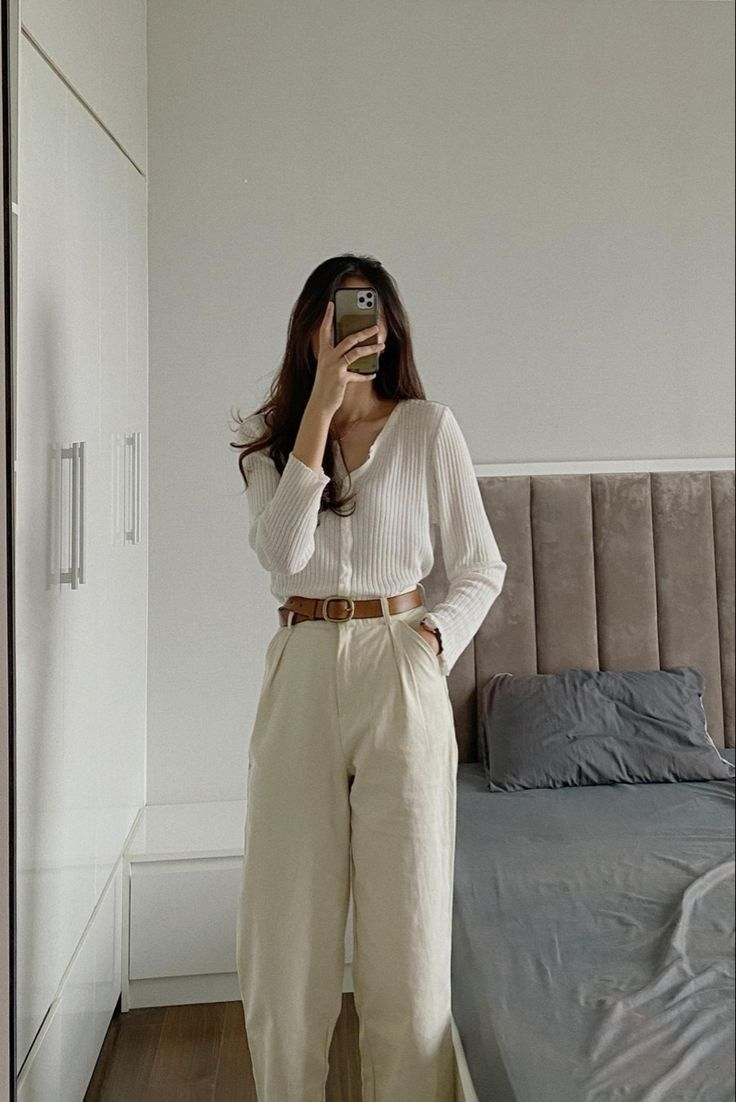

Recognition Result:
 - minimalist: 99.60% (score = 0.99602)
 - street: 0.40% (score = 0.00398)



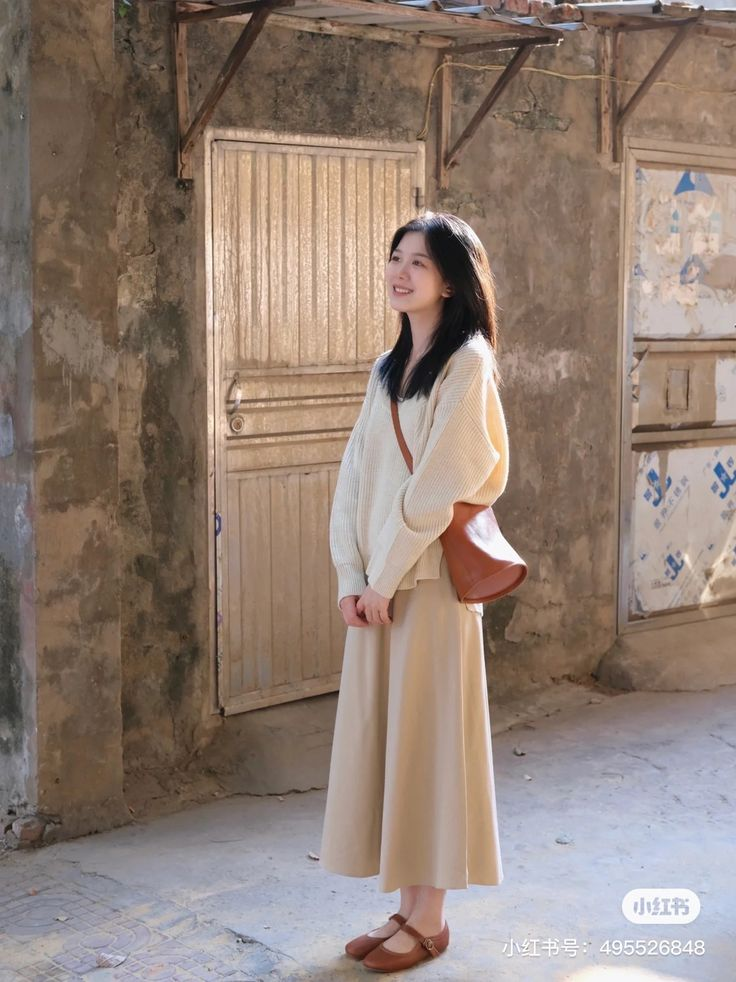

Recognition Result:
 - minimalist: 87.17% (score = 0.87174)
 - street: 12.83% (score = 0.12826)



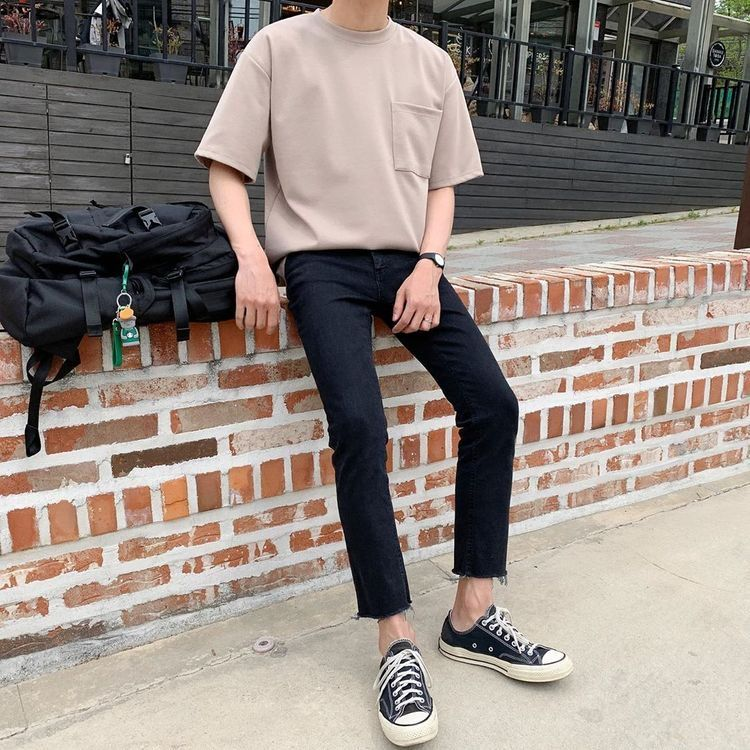

Recognition Result:
 - street: 78.06% (score = 0.78057)
 - minimalist: 21.94% (score = 0.21943)



In [12]:
# open your test images
uploaded = files.upload()
for fn in uploaded.keys():

  # recognizing images
  path = '/content/' + fn
  Recognition("/content/drive/MyDrive/research/armrest.pb", path)
